# Summary 





In [15]:
import networkx as nx
import matplotlib.pyplot as plt 
import pandas as pd
from typing import Tuple

In [16]:
vertices = pd.read_csv('./data/vertices.csv', index_col=None)
vertices.head()

,~id,name:String
0,v0,Container
1,v1,Hashable
2,v2,Iterable
3,v3,Iterator
4,v4,Reversible


In [17]:
edges_df = pd.read_csv("./data/edges.csv", index_col=None)
edges_df.head()

,~id,~from,~to,~label
0,e0,v3,v2,extends
1,e1,v4,v2,extends
2,e2,v5,v3,extends
3,e3,v8,v6,extends
4,e4,v8,v2,extends


In [18]:
def pairing(row: pd.Series) -> Tuple[str, str]:
    return (row['~from'], row['~to'])

edges_df['pair'] = edges_df.apply(pairing, axis=1)
edges_df.head()

,~id,~from,~to,~label,pair
0,e0,v3,v2,extends,"(v3, v2)"
1,e1,v4,v2,extends,"(v4, v2)"
2,e2,v5,v3,extends,"(v5, v3)"
3,e3,v8,v6,extends,"(v8, v6)"
4,e4,v8,v2,extends,"(v8, v2)"


## DiGraph 

In [51]:
G = nx.DiGraph()
G.add_nodes_from(vertices['~id'])
G.add_edges_from(edges_df.pair)

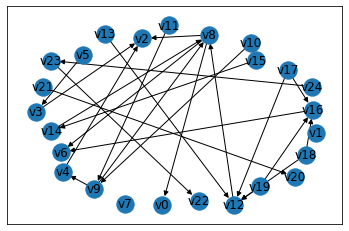

In [52]:
pos = nx.drawing.layout.spring_layout(G, 10)
nx.draw_networkx(G, pos)

In [55]:
res = nx.eigenvector_centrality_numpy(G)
nx.function.density(G)

0.04

In [59]:
print(nx.function.info(G))

Name: 
Type: DiGraph
Number of nodes: 25
Number of edges: 24
Average in degree:   0.9600
Average out degree:   0.9600


In [67]:
nx.cluster.average_clustering(G)

0.0

In [85]:
degree = nx.degree_centrality(G)
closeness = nx.closeness_centrality(G)
between = nx.betweenness_centrality(G)
page_rank = nx.algorithms.pagerank_numpy(G)
df = pd.DataFrame.from_records([degree, closeness, between, page_rank], index=['degree', 'closeness', 'betweeness', 'pagerank']).T
df.head()

,degree,closeness,betweeness,pagerank
v0,0.041667,0.180060,0.000000,0.053615
v1,0.000000,0.000000,0.000000,0.019103
v2,0.125000,0.255208,0.000000,0.118524
v3,0.083333,0.041667,0.001812,0.035341
v4,0.083333,0.075000,0.002717,0.041024


In [86]:
df = pd.merge(left=df, right=vertices, left_index=True, right_on='~id').set_index('~id')
df.head()

,degree,closeness,betweeness,pagerank,name:String
~id,,,,,
v0,0.041667,0.180060,0.000000,0.053615,Container
v1,0.000000,0.000000,0.000000,0.019103,Hashable
v2,0.125000,0.255208,0.000000,0.118524,Iterable
v3,0.083333,0.041667,0.001812,0.035341,Iterator
v4,0.083333,0.075000,0.002717,0.041024,Reversible


In [91]:
df.sort_values('degree', ascending=False).head()

,degree,closeness,betweeness,pagerank,name:String
~id,,,,,
v8,0.250000,0.245098,0.046196,0.121806,Collection
v12,0.208333,0.166667,0.023551,0.059697,Set
v16,0.166667,0.125000,0.005435,0.043459,MappingView
v9,0.166667,0.083333,0.018116,0.051578,Sequence
v2,0.125000,0.255208,0.000000,0.118524,Iterable


In [90]:
df.sort_values('closeness', ascending=False).head()

,degree,closeness,betweeness,pagerank,name:String
~id,,,,,
v2,0.125000,0.255208,0.000000,0.118524,Iterable
v8,0.250000,0.245098,0.046196,0.121806,Collection
v6,0.083333,0.230769,0.000000,0.090555,Sized
v0,0.041667,0.180060,0.000000,0.053615,Container
v12,0.208333,0.166667,0.023551,0.059697,Set


In [92]:
df.sort_values('betweeness', ascending=False).head()

,degree,closeness,betweeness,pagerank,name:String
~id,,,,,
v8,0.250000,0.245098,0.046196,0.121806,Collection
v12,0.208333,0.166667,0.023551,0.059697,Set
v9,0.166667,0.083333,0.018116,0.051578,Sequence
v14,0.083333,0.041667,0.007246,0.035341,Mapping
v16,0.166667,0.125000,0.005435,0.043459,MappingView


In [93]:
df.sort_values('pagerank', ascending=False).head()

,degree,closeness,betweeness,pagerank,name:String
~id,,,,,
v8,0.250000,0.245098,0.046196,0.121806,Collection
v2,0.125000,0.255208,0.000000,0.118524,Iterable
v6,0.083333,0.230769,0.000000,0.090555,Sized
v12,0.208333,0.166667,0.023551,0.059697,Set
v0,0.041667,0.180060,0.000000,0.053615,Container
